In [ ]:
import pandas as pd
import numpy as np
import seaborn           as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### help

In [ ]:
from IPython.core.display     import HTML
from IPython.display          import Image

# adjust jupyter notebook viz
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


# Experiment

Data Set Information:
We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.


Specifically:
X1 Relative Compactness
X2 Surface Area
X3 Wall Area
X4 Roof Area
X5 Overall Height
X6 Orientation
X7 Glazing Area
X8 Glazing Area Distribution
y1 Heating Load
y2 Cooling Load



In [ ]:
df = pd.read_excel('ENB2012_data.xlsx', encoding='utf-8')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [ ]:
cols = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Orientation', 'Glazing_Area',
        'Glazing_Distribution', 'Y1_Heating_Load', 'Y2_Cooling_Load']

In [ ]:
# Especificamente:

# Compacidade relativa X1
# Área de Superfície X2
# Área da Parede X3
# Área do telhado X4
# Altura Geral X5
# Orientação X6
# Área de Envidraçamento X7
# Distribuição da área de envidraçamento X8
# y1 Carga de aquecimento
# y2 carga de resfriamento

In [ ]:
df.columns = cols

In [ ]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Distribution,Y1_Heating_Load,Y2_Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


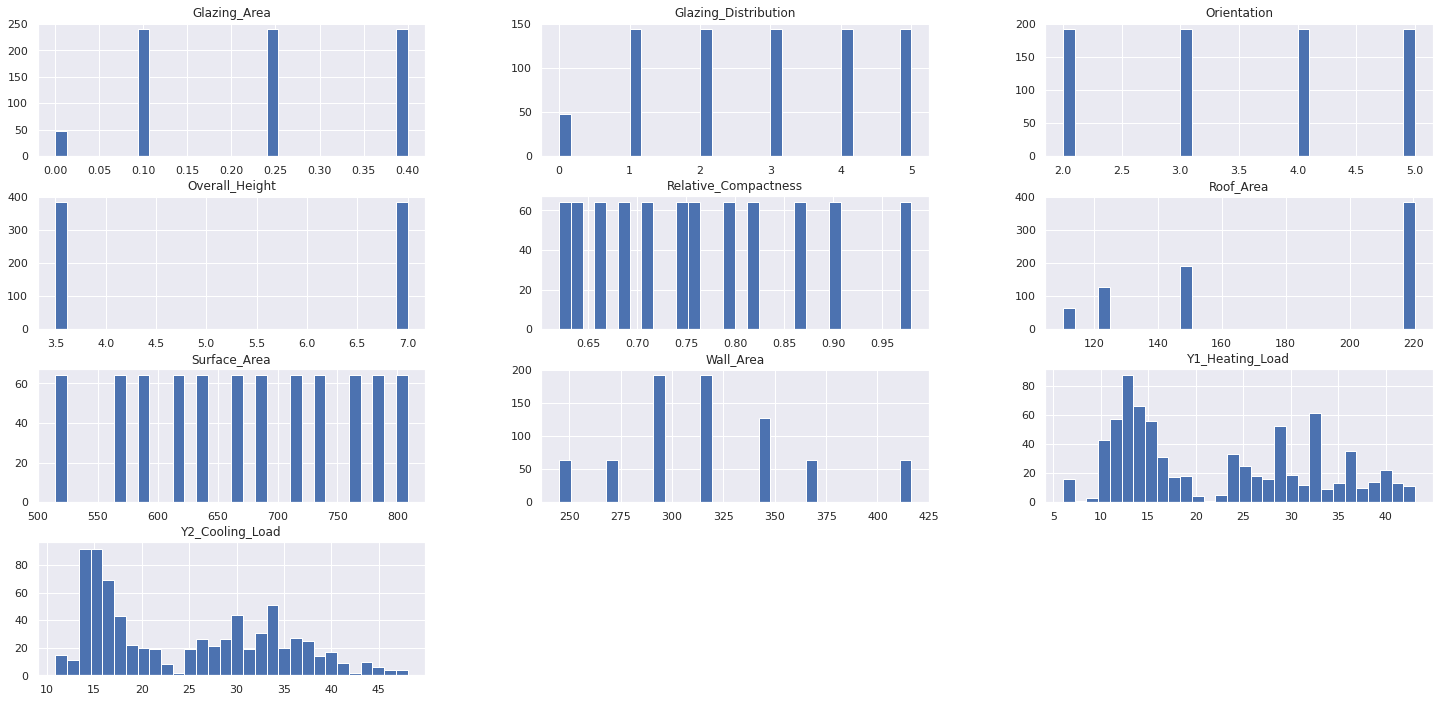

In [ ]:
df.hist( bins=30);

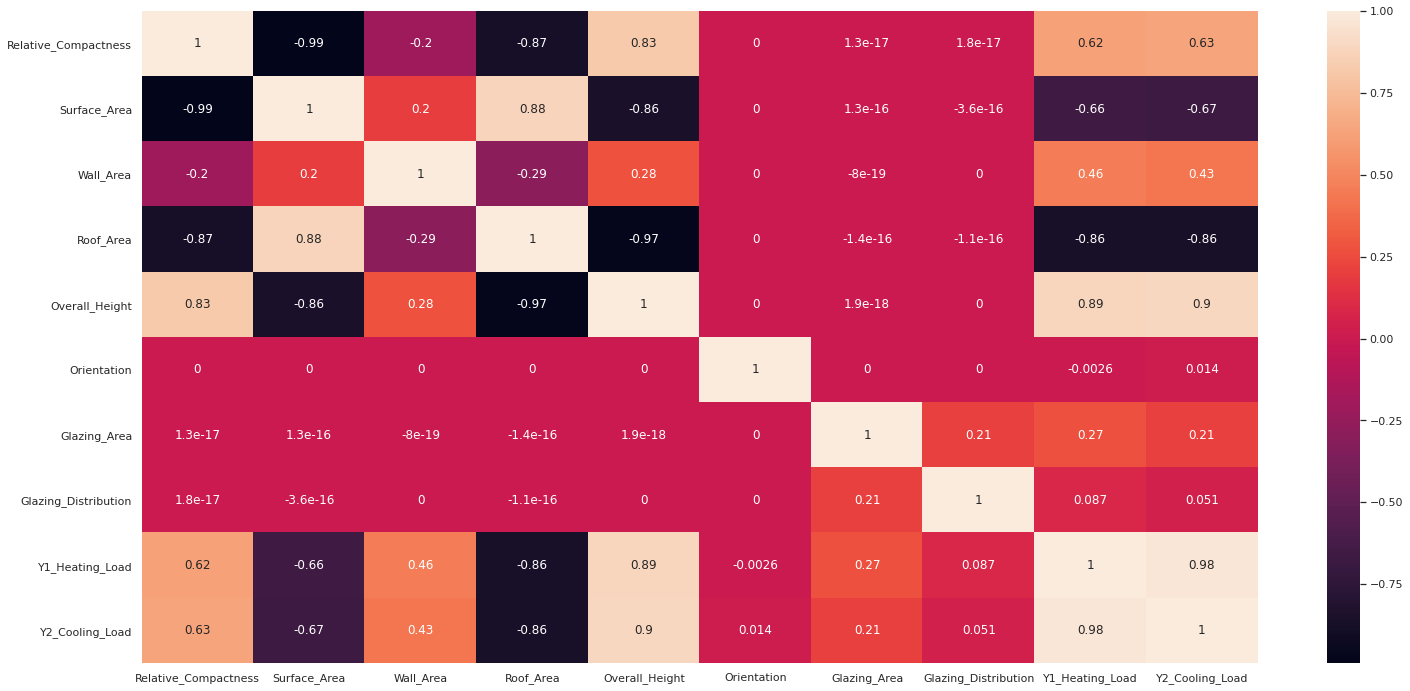

In [ ]:
correlation_num = df.corr(method  = 'pearson')
sns.heatmap(correlation_num, annot = True );

## Statsmodels

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
df1 = df.copy()

In [ ]:
# Dividindo os dados em X e Y.
# y1 Carga de aquecimento

X  = df1.drop('Y1_Heating_Load', axis = 1)
Y = df1['Y1_Heating_Load']

In [ ]:
X.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Distribution,Y2_Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,28.28


In [ ]:
# Add coef values X, bias calculado automaticamente!

X = sm.add_constant(X)
model = smf.ols(formula=' Y1_Heating_Load ~ Y2_Cooling_Load' , data = df1)
modelo1 = model.fit()

In [ ]:
# Linear Regression with statsmodels

# Simple Linear Regression :
#model = smf.ols(formula=' Y1_Heating_Load ~ Y2_Cooling_Load' , data = df)

# Multiple linear regression :

model = sm.OLS(Y, X) 
modelo1 = model.fit()
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Y1_Heating_Load   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     2974.
Date:                Fri, 14 Aug 2020   Prob (F-statistic):               0.00
Time:                        08:51:38   Log-Likelihood:                -1529.6
No. Observations:                 768   AIC:                             3077.
Df Residuals:                     759   BIC:                             3119.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   13.2017     11.734      1.125      0.261      -9.834      36.237
Relative_Compactness   -13.2277      6.415     -2.062      0.040     -25.822      -0.634
Surface_Area            -0.0145      0.008     -1.754      0.080      -0.031       0.002
Wall_Area                0.0197      0.002      8.276      0.000       0.015       0.024
Roof_Area               -0.0171      0.005     -3.674      0.000      -0.026      -0.008
Overall_Height           1.0506      0.223      4.713      0.000       0.613       1.488
Orientation             -0.1118      0.058     -1.941      0.053      -0.225       0.001
Glazing_Area             9.2162      0.577     15.966      0.000       8.083      10.349
Glazing_Distribution     0.1741      0.043      4.097      0.000       0.091       0.258
Y2_Cooling_Load          0.7282      0.020     36.032      0.000       0.689       0.768
==============================================================================
Omnibus:                       90.267   Durbin-Watson:                   1.375
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              253.303
Skew:                           0.594   Prob(JB):                     9.91e-56
Kurtosis:                       5.550   Cond. No.                     1.46e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.13e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
from sklearn import linear_model

In [ ]:
# Definindo x e y
model_sk = linear_model.LinearRegression( normalize = False, fit_intercept = True )
X  = df1.drop('Y1_Heating_Load', axis = 1).values
y = df1['Y1_Heating_Load'].values

model_sk.fit(X,y)
model_sk

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(model_sk.coef_)
print(model_sk.intercept_)
print(model_sk.predict(X))

In [ ]:
# Comparando Performace com amostra de 15.000.000
from sklearn.datasets import make_regression
HX, Hy = make_regression(n_samples = 15000000, n_features = 9, n_targets = 1, random_state = 246  )

In [ ]:
%%time
sk_linear_regression = linear_model.LinearRegression( normalize = False, fit_intercept = True)
sk_linear_regression.fit(HX,Hy)

CPU times: user 5.54 s, sys: 604 ms, total: 6.14 s
Wall time: 4.71 s


In [ ]:
%%time
sm_linear_regression = sm.OLS(Hy, sm.add_constant(HX))
sm_linear_regression.fit()

CPU times: user 14.6 s, sys: 1.31 s, total: 15.9 s
Wall time: 11.6 s
